In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sportsipy.ncaab import boxscore
from sportsipy.ncaab.teams import Teams
from sportsipy.ncaab.teams import Team

df = pd.read_csv('../data/2018-2019_pregamestatsfinal.csv')

In [ ]:
df.head()

In [ ]:
# We have a population of just 1 season. We need to create a holdout sample to test with
test_df = df.sample(frac = 0.15)

train_df = pd.concat([test_df,df]).drop_duplicates(keep=False)

print(len(df), ' ', len(test_df), ' ', len(train_df))

train_df.head()


In [ ]:
# Dropping irrelevant columns
train_df.drop(columns=['conf', 'home_team_name', 'away_team_name', 'team_name', 'winning_abbr', 'winning_name', 'losing_name', 'losing_abbr', 'location', 'home_team', 'away_team'], inplace=True)
test_df.drop(columns=['conf', 'home_team_name', 'away_team_name', 'team_name', 'winning_abbr', 'winning_name', 'losing_name', 'losing_abbr', 'location', 'home_team', 'away_team'], inplace=True)

test_df.head()

In [ ]:
test_df.isnull().sum()

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.countplot(x='winner', data= train_df)

In [ ]:
#train_df['away_pregame_eFG'].plot(kind='box', figsize= (10,8))

# Create bool masks where home team won - we will use this to get 1 and 0 for the results
winnermask1 = (test_df['winner'] == 'Home')
winnermask2 = (train_df['winner'] == 'Home')


In [ ]:
# Setting a new column equal to the bool mask of winner = Home
train_df['Home_Win'] = (train_df['winner'] == 'Home')
test_df['Home_Win'] = (test_df['winner'] == 'Home')

In [ ]:
test_df.head()

In [ ]:

#Turning the True/False into 1/0
train_df["Home_Win"] = train_df["Home_Win"].astype(int)
test_df["Home_Win"] = test_df["Home_Win"].astype(int)



In [ ]:
# Creating a column that has the month the game took place in. Not sure whether this is 100% a good idea
train_df.reset_index(inplace=True)

for i in range(0,5000):
    datestring = train_df.at[i, 'date']
    if 'Novemb' in datestring:
        train_df.at[i, 'month'] = 'November'
    elif 'Dece' in datestring:
        train_df.at[i, 'month'] = 'December'
    elif 'Janu' in datestring:
        train_df.at[i, 'month'] = 'January'
    elif 'Febr' in datestring:
        train_df.at[i, 'month'] = 'February'
    elif 'Mar' in datestring:
        train_df.at[i, 'month'] = 'March'
    elif 'Apr' in datestring:
        train_df.at[i, 'month'] = 'April'
    else:
        print('error')

In [ ]:
# Do the same for the testing data
test_df.reset_index(inplace=True)

for i in range(0,5000):
    datestring = test_df.at[i, 'date']
    if 'Novemb' in datestring:
        test_df.at[i, 'month'] = 'November'
    elif 'Dece' in datestring:
        test_df.at[i, 'month'] = 'December'
    elif 'Janu' in datestring:
        test_df.at[i, 'month'] = 'January'
    elif 'Febr' in datestring:
        test_df.at[i, 'month'] = 'February'
    elif 'Mar' in datestring:
        test_df.at[i, 'month'] = 'March'
    elif 'Apr' in datestring:
        test_df.at[i, 'month'] = 'April'
    else:
        print('error')


In [ ]:
# Drop irrelevant columns - might run into errors here
train_df.drop(columns=['level_0', 'index', 'boxscore', 'date', 'winner'], inplace=True)
test_df.drop(columns=['index', 'boxscore', 'date', 'winner'], inplace=True)


In [ ]:
# Get dummies for the month
train_df= pd.get_dummies(train_df, columns=['month'], drop_first= True)
test_df= pd.get_dummies(test_df, columns=['month'], drop_first= True)

In [ ]:
# Filling null values with the median. Not sure if this is the best approach yet, vs. just dropping the nulls. It's 3% of the games
train_df['away_pregame_rebound_percentage'].fillna(train_df['away_pregame_rebound_percentage'].median(), inplace=True)
train_df['away_pregame_eFG_allowed'].fillna(train_df['away_pregame_eFG_allowed'].median(), inplace=True)
train_df['away_pregame_eFG'].fillna(train_df['away_pregame_eFG'].median(), inplace=True)
train_df['away_pregame_win_percentage'].fillna(train_df['away_pregame_win_percentage'].median(), inplace=True)

train_df['home_pregame_rebound_percentage'].fillna(train_df['home_pregame_rebound_percentage'].median(), inplace=True)
train_df['home_pregame_eFG_allowed'].fillna(train_df['home_pregame_eFG_allowed'].median(), inplace=True)
train_df['home_pregame_eFG'].fillna(train_df['home_pregame_eFG'].median(), inplace=True)
train_df['home_pregame_win_percentage'].fillna(train_df['home_pregame_win_percentage'].median(), inplace=True)

In [ ]:
# Repeat for test data
test_df['away_pregame_rebound_percentage'].fillna(test_df['away_pregame_rebound_percentage'].median(), inplace=True)
test_df['away_pregame_eFG_allowed'].fillna(test_df['away_pregame_eFG_allowed'].median(), inplace=True)
test_df['away_pregame_eFG'].fillna(test_df['away_pregame_eFG'].median(), inplace=True)
test_df['away_pregame_win_percentage'].fillna(test_df['away_pregame_win_percentage'].median(), inplace=True)

test_df['home_pregame_rebound_percentage'].fillna(test_df['home_pregame_rebound_percentage'].median(), inplace=True)
test_df['home_pregame_eFG_allowed'].fillna(test_df['home_pregame_eFG_allowed'].median(), inplace=True)
test_df['home_pregame_eFG'].fillna(test_df['home_pregame_eFG'].median(), inplace=True)
test_df['home_pregame_win_percentage'].fillna(test_df['home_pregame_win_percentage'].median(), inplace=True)

In [ ]:
test_df.isnull().sum()

In [ ]:
# shift column 'Name' to first position
first_column = test_df.pop('Home_Win')
  
# insert column using insert(position,column_name,
# first_column) function
test_df.insert(0, 'Home_Win', first_column)
test_df.head()

In [ ]:
# shift column 'Name' to first position
first_column = train_df.pop('Home_Win')
  
# insert column using insert(position,column_name,
# first_column) function
train_df.insert(0, 'Home_Win', first_column)
train_df.head()

In [ ]:
# Create separate dataframes for the features and target variable so we can train the model
x_train = train_df.iloc[:,1:]
y_train = train_df['Home_Win'].values.reshape(-1,1)

#This will be used to test our performance
x_test = test_df.iloc[:,1:]
y_test = test_df['Home_Win'].values.reshape(-1,1)


In [ ]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
features= ['away_pregame_eFG', 'away_pregame_rebound_percentage', 'away_pregame_eFG_allowed', 'away_pregame_win_percentage','home_pregame_eFG', 'home_pregame_rebound_percentage', 'home_pregame_eFG_allowed', 'home_pregame_win_percentage']

# Apply transformations to the features we need to normalize on a (-1, 1) scale. Makes the model faster
x_train[features]= ss.fit_transform(x_train[features])
x_test[features]= ss.fit_transform(x_test[features])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# clf is our model object
clf.fit(x_train, y_train.ravel())

In [ ]:
print(clf.score(x_train, y_train))

In [127]:
# Get predictions on the test data using our model
predictions = clf.predict(x_test)
win_probability = clf.predict_proba(x_test)

In [131]:
# output predictions to a DF
predictionsdf = pd.DataFrame({'Win_Home': test_df['Home_Win'], 'Prediction': predictions })
#predictionsdf.head()


In [135]:
# Create dataframe based on forecasted probability of each game 
win_probability_df = pd.DataFrame(win_probability, columns=['Home_Loss', 'Home_Win'])
win_probability_df= win_probability_df.merge(predictionsdf, left_index=True, right_index=True, how='outer')
win_probability_df.head()
# Create histogram to show distribution
win_probability_df['Home_Win'].hist(bins=20)

,Home_Loss,Home_Win,Win_Home,Prediction
0,0.401801,0.598199,0,1
1,0.262481,0.737519,1,1
2,0.401981,0.598019,1,1
3,0.420508,0.579492,1,1
4,0.417486,0.582514,0,1


<AxesSubplot:>

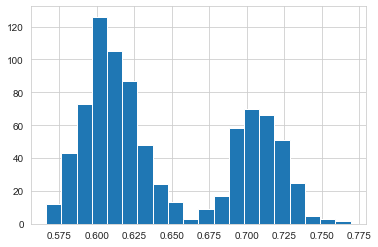

In [143]:
# Getting the accuracy for the games that we forecast extra high and low likelihood
topbucket = win_probability_df[win_probability_df['Home_Win'] > 0.7]
topbucket.head()

bottombucket = win_probability_df[win_probability_df['Home_Win'] < 0.6]
bottombucket.head()

,Home_Loss,Home_Win,Win_Home,Prediction
0,0.401801,0.598199,0,1
2,0.401981,0.598019,1,1
3,0.420508,0.579492,1,1
4,0.417486,0.582514,0,1
7,0.403518,0.596482,1,1


In [144]:
from sklearn.metrics import accuracy_score
# Get the accuracy score for our overall predictions, the top and bottom buckets
overallaccuracy = accuracy_score(predictionsdf['Win_Home'], predictionsdf['Prediction'])
topbucketaccuracy = accuracy_score(topbucket['Win_Home'], topbucket['Prediction'])
bottombucketaccuracy = accuracy_score(bottombucket['Win_Home'], bottombucket['Prediction'])
print('Overall Accuracy: ', overallaccuracy, '      Accuracy p>.70: ', topbucketaccuracy, '     Accuracy p<.60: ',  bottombucketaccuracy)

Overall Accuracy: 0.623      Accuracy p>.70:  0.6190476190476191


In [147]:
# Getting confidence ratings for our predictions. >=1 is very confident
confidence = clf.decision_function(x_test)
confidencedf = pd.DataFrame(confidence, columns=['Confidence_Score'])

In [149]:
confidencedf.head(30)

,Confidence_Score
0,0.397965
1,1.033114
2,0.397219
3,0.320688
4,0.333100
5,0.514339
6,0.419319
7,0.390828
8,0.483451
9,0.439728


In [175]:
#  functions for accuracy based on high and low confidence projections
highconfidencedf = confidencedf[confidencedf['Confidence_Score'] >.95]

highconfidencedf = highconfidencedf.merge(predictionsdf, left_index=True, right_index=True, how='outer')
highconfidencedf.dropna(axis=0, how='any', inplace=True)


highconfidenceaccuracy = accuracy_score(highconfidencedf['Win_Home'], highconfidencedf['Prediction'])
print(highconfidenceaccuracy)

0.631578947368421


In [172]:
len(highconfidencedf)

138